In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [1]:
print("hello")

hello


In [15]:
# Load data
data = pd.read_csv('reliance_dataset.csv')
data = data['Close'].values.reshape(-1,1)

In [16]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [17]:

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

In [18]:

# Convert data into sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 1):
        X.append(data[i:(i+seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)


In [19]:

# Reshape data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [20]:

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))


In [21]:

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')


In [22]:

# Train model
model.fit(X_train, y_train,epochs=75, batch_size=32)


Epoch 1/75


31/31 [==============================] - 9s 16ms/step - loss: nan
Epoch 2/75
31/31 [==============================] - 1s 18ms/step - loss: nan
Epoch 3/75
31/31 [==============================] - 1s 16ms/step - loss: nan
Epoch 4/75
31/31 [==============================] - 1s 17ms/step - loss: nan
Epoch 5/75
31/31 [==============================] - 1s 17ms/step - loss: nan
Epoch 6/75
31/31 [==============================] - 0s 16ms/step - loss: nan
Epoch 7/75
31/31 [==============================] - 1s 16ms/step - loss: nan
Epoch 8/75
31/31 [==============================] - 0s 16ms/step - loss: nan
Epoch 9/75
31/31 [==============================] - 1s 16ms/step - loss: nan
Epoch 10/75
31/31 [==============================] - 1s 17ms/step - loss: nan
Epoch 11/75
31/31 [==============================] - 0s 15ms/step - loss: nan
Epoch 12/75
31/31 [==============================] - 1s 16ms/step - loss: nan
Epoch 13/75
31/31 [==============================] - 1s 16ms/step - loss: nan
Epoch 

In [23]:

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


8/8 [==============================] - 2s 6ms/step


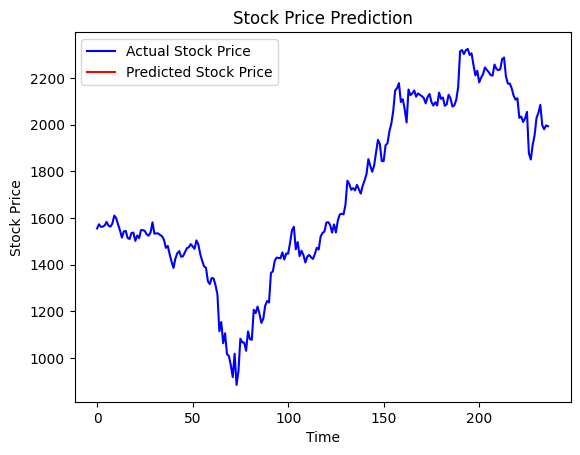

In [24]:

# Visualize results
plt.plot(data[train_size + seq_length:len(data)], color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()